In [1]:
# World Wide Women's Problems
# In this we will investigate women's problems using Human Freedom Index dataset.

# Human Freedom Index dataset is about: 
# "A central purpose of The Human Freedom Index is to paint a broad but reasonably accurate picture of the extent of 
# overall freedom in the world. A larger purpose is to more carefully explore what we mean by freedom 
# and to better understand its relationship to any number of other social and economic phenomena."

# From the dataset we will focus on women related datas related to countries and regions;
# * Missing women,
# * Inheritance rights,
# * Women's security,
# * Overall security and safety,
# * Freedom of movement,
# * Freedom of religion,
# * Rule of Law,
# * Economic freedom.

# we will execute this from the dataset for the year 2018.

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# word cloud library
from wordcloud import WordCloud

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import os

# Any results you write to the current directory are saved as output.

In [4]:
data = pd.read_csv('hfi_cc_2018.csv')
data.head(5)

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,10.0,10.000000,10.000000,10.000000,10.0,7.5,5.0,5.0,5.0,7.500000,8.806810,5.0,10.0,5.0,6.666667,NaN,NaN,10.0,9.566667,8.011111,9.192593,10.0,10.0,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,10.0,10.0,10.0,10.0,5.000000,5.25,10.0,10.0,10.0,8.607143,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.596281,57.0,8.232353,7.509902,8.0,9.0,7.0,8.0,7.935564,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287,6.933500,6.215401,0.948718,5.071814,8.986454,9.484575,9.74360,10.0,9.553657,9.626667,9.24,8.0240,8.963556,5.574481,9.405328,7.489905,10.00000,6.306106,4.615385,8.296923,6.406138,8.214900,5.0,7.295687,9.0,7.098562,5.566667,5.396399,6.234861,8.0,6.299741,10.0,6.916278,6.072172,6.000000,9.713864,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,5.0,9.926119,9.990149,8.842060,10.0,7.5,0.0,0.0,0.0,5.833333,8.043882,5.0,5.0,5.0,5.000000,NaN,NaN,5.0,6.873333,2.961111,4.944815,5.0,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0,10.0,10.0,2.666667,4.00,10.0,7.5,7.5,7.380952,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,5.281772,147.0,2.150000,7.817129,0.0,7.0,2.0,4.5,3.616782,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692,6.136845,6.737383,0.820513,4.690743,6.955962,8.339152,8.72046,5.0,7.

In [5]:
# 1. ANALYSE SECURITY AND FREEDOM OF MOVEMENT OF WOMEN IN MIDDLE EASTERN & NORTH AFRICAN COUNTRIES IN 2016
# We start our analysis by investigating freedom of women's movement in Middle Eastern 
# and North African countries because of the unstable conditions of the region.
# First of all we need to filter the data set for the year 2016 and for the Middle East and North African regions.

# Filtering data to observe Middle Eastern and North Africaan Countries in the most recent year (2016) :
filter01 = data.year == 2016
filter02 = data.region == 'Middle East & North Africa'
data01 = data[filter01 & filter02]
data01.sample(5)

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
86,2016,LBY,Libya,Middle East & North Africa,NaN,NaN,NaN,2.198018,8.998449,5.0,0.000000,0.0,0.000000,0.000000,1.000000,10.0,7.5,0.0,0.0,0.0,5.833333,5.277261,NaN,NaN,5.0,5.000000,NaN,NaN,7.5,7.533333,5.783333,6.938889,2.5,2.5,NaN,NaN,2.5,NaN,NaN,2.5,NaN,NaN,2.5,2.5,0.00000,10.000000,2.666667,1.25,7.5,7.5,5.0,4.845238,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,3.880566,159.0,0.000000,NaN,NaN,10.0,9.0,9.5,4.750000,3.398277,2.332075,3.278082,5.000000,6.666667,3.623948,NaN,1.672884,2.451828,0.804878,3.206339,7.001157,1.058436,4.5800,10.0,5.659898,NaN,NaN,NaN,NaN,5.505607,4.258602,4.882105,7.372263,5.009764,0.769231,0.331877,2.036957,4.763775,0.0,10.000000,10.0,6.666667,7.233333,2.654694,5.387762,8.0,4.387940,10.0,6.277288,3.205259,0.000000,8.425078,3.132050,NaN,0.034909,2.959459,5.301138,4.74,161.0,4.310283,158.0,4.0
150,2016,TUR,Turkey,Middle East & North Africa,3.579995,4.373414,3.970161,3.974523,8.274906,10.0,0.000000,2.5,5.791014,3.027505,4.263704,10.0,10.0,10.0,10.0,10.0,10.000000,7.512870,10.0,10.0,10.0,10.000000,NaN,NaN,2.5,7.048889,3.933333,4.494074,7.5,5.0,NaN,NaN,5.0,NaN,NaN,2.5,NaN,NaN,2.5,4.5,7.48467,0.000000,1.000000,1.75,5.0,7.5,5.0,3.962096,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,6.092465,118.0,5.920588,6.385132,7.0,7.0,7.0,7.0,6.576430,3.437320,3.177842,5.590816,3.333333,5.000000,4.580553,8.881572,5.576923,5.755081,0.897436,4.778739,7.966541,9.640305,8.4450,10.0,9.012

In [6]:
# Now we can draw our scatter graphic. 
# First trace will show us Middle East and North African women's security level in 2016. 
# First trace of the graphic will be red. 
# Second trace will show us the women's freedom of movement in the same regions in 2016. Second trace will be green.

# First trace will be security of women in 2016: 
trace01 = go.Scatter(
                     x = data01['ISO_code'],
                     y = data01['pf_ss_women'],
                     mode = 'lines+markers',
                     name = 'Security of Women',
                     marker = dict(color = 'rgba(150, 20, 20, 0.5)'),
                     text= data01['countries'])
# Second trace will show us freedom of women movement in 2016:
trace02 = go.Scatter(
                     x = data01['ISO_code'],
                     y = data01['pf_movement_women'],
                     mode = 'lines+markers',
                     name = 'Freedom of Movement',
                     marker = dict(color = 'rgba(20, 150, 20, 0.5)'),
                     text= data01['countries'])
datanew = [trace01, trace02]
layoutnew = dict(title = 'Security of Women and Freedom of Women Movement Comparison in Middle East and Northern Africa',
                 xaxis = dict(title = 'Countries', ticklen = 3, zeroline = False))
fig = dict(data=datanew, layout=layoutnew)
py.iplot(fig)

In [7]:
# From the graphic above one can see some country's women has less freedom of movement, 
# even the women's security level is high in the country. 
# This might be related by different conditions like; 
# religion, culture, women's role in the economy or the law system of the country

In [8]:
# 2. ANALYSE SECURITY OF WOMEN IN LATIN AMERICA AND THE CARIBBEAN BETWEEN 2008, 2013 AND 2016
# Our second analysis will focus on women's security in Latin American and Caribbean Countries.
# We will use three plots for 2008, 2013 and 2016 years in order to see security level difference in the region.

# Filtering dataset to three different years (2008, 2013,2016)
data2008 = data[data.year == 2008]
data2008 = data2008[data2008.region == 'Latin America & the Caribbean']

data2013 = data[data.year == 2013]
data2013 = data2013[data2013.region == 'Latin America & the Caribbean']

data2016 = data[data.year == 2016]
data2016 = data2016[data2016.region == 'Latin America & the Caribbean']

# First trace is security of women in 2008:
trace2008 = go.Scatter(
                        x = data2008['ISO_code'],
                        y = data2008['pf_ss_women'],
                        mode = 'markers',
                        name = 'Women Security in 2008',
                        marker = dict(color='rgba(0,0,255,0.5)'),
                        text = data2008['countries'])

# Second trace is security of women in 2013:
trace2013 = go.Scatter(
                        x = data2013['ISO_code'],
                        y = data2013['pf_ss_women'],
                        mode = 'markers',
                        name = 'Women Security in 2013',
                        marker = dict(color='rgba(0,255,0,0.5)'),
                        text = data2013['countries'])

# Third trace is security of women in 2016:
trace2016 = go.Scatter(
                        x = data2016['ISO_code'],
                        y = data2016['pf_ss_women'],
                        mode = 'markers',
                        name = 'Women Security in 2016',
                        marker = dict(color='rgba(255,0,0,0.5)'),
                        text = data2016['countries'])
datanew = [trace2008, trace2013, trace2016]
layoutnew = dict(title = 'Security of Women in Latin America & the Caribbean Between 2008, 2013, 2016',
                 xaxis = dict(title = 'Countries', ticklen = 3, zeroline = False))
fig = dict(data=datanew, layout=layoutnew)
py.iplot(fig)

In [9]:
# From the graph above one can see in some countries women's security level decreases with years. 
# This analysis can give a clue if that country is in an unstable condition 
# or transition in their culturel/political/economic etc states.

In [10]:
# 3. INVESTIGATE RELATIONSHIP BETWEEN MISSING WOMEN AND SECURITY LEVEL IN MIDDLE EASTERN AND NORTH AFRICAN COUNTRIES
# Because of conflicts, wars and immigration issues in Middle Eastern and North African countries, 
# We wantted to investigate missing women in the region.
# In order to do that, We compared missing women and security level datas of the countries.

# Missing women in Middle East and North Africa:
trace01 = go.Bar(
                 x = data01['ISO_code'],
                 y = data01['pf_ss_women_missing'],
                 name = 'Missing Women',
                 marker = dict(color='rgba(130, 35, 45, 0.5)',
                              line = dict(color='rgba(0,0,0)', width=0.5)),
                 text = data01.countries)
# Security Level of the Country:
trace02 = go.Bar(
                 x = data01['ISO_code'],
                 y = data01['pf_ss'],
                 name = 'Security of the Country',
                 marker = dict(color='rgba(45, 35, 145, 0.5)',
                              line = dict(color='rgba(0,0,0)', width=0.5)),
                 text = data01.countries)
datanew = [trace01, trace02]
layoutnew = go.Layout(barmode='group', title='Missing Women Comparison')
fig = go.Figure(data=datanew, layout=layoutnew)
py.iplot(fig)

In [11]:
# From the graph above one can easly see that, there is a missing women problem even the country's security level is high 
#(like Israel, Lebanon, Morrocco, Turkey).

In [12]:
# 4. ANALYSE SECURITY OF WOMEN AMONG MIDDLE EASTERN AND NORTH AFRICAN COUNTRIES
# One can see an overall comparison of the women's security level in Middle Eastern and North African countries.

# Analysing security of women among Middle East and North African Countries:
fig = {
        'data': [ 
             {
                'values' : data01['pf_ss_women'],
                'labels' : data01['countries'],
                'domain' : {'x': [0, 1]},
                'name' : 'Security for Women',
                'hoverinfo' : 'label+percent+name',
                'hole' : 0.3,
                'type' : 'pie'
              },
             ],
         'layout' : {
                     'title' : 'Security of Women Among Middle East and N.Africa',
                     'annotations' : [
                                        { 'font' : {'size' : 20},
                                          'showarrow' : False,
                                          'text' : ' ',
                                          'x' : 0.20,
                                          'y' : 1
                                         },
                                      ]    
                     }
        }
py.iplot(fig)

In [13]:
# 5. COMPARE RELATIONSHIP BETWEEN SECURITY OF WOMEN & RULE OF LAW & FREEDOM OF RELIGION IN EUROPEAN COUNTIRES
# In this analysis I focues on European countries by comparing security of women, rule of law and freedom of religion datas.

# Filtering data to see only European Countries informations in 2016:
dataE = data[data.year == 2016]
dataEU = dataE[(dataE.region == 'Western Europe') + (dataE.region == 'Eastern Europe')]
dataEU = dataEU.dropna(subset=['pf_ss_women_missing'])
dataEU.sample(5)

D:\anaconda_folder\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning:

evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead



,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
154,2016,GBR,United Kingdom,Western Europe,8.227729,7.512237,7.409705,7.716557,9.519036,10.0,10.0,10.0,9.954265,9.939020,9.978657,10.0,10.0,10.0,10.0,10.0,10.000000,9.832564,10.0,10.0,10.0,10.000000,NaN,NaN,10.0,7.573333,5.183333,7.585556,10.0,10.0,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,10.0,10.0,10.0,10.0,7.000000,7.75,10.0,10.0,10.0,9.250000,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.25,8.995836,18.0,5.211765,5.445781,8.0,6.0,2.0,4.0,5.664386,8.910224,7.134579,8.829254,10.000000,8.333333,4.394428,8.015852,8.351080,6.675237,1.000000,7.849332,9.765756,9.736825,9.87168,10.0,9.843565,9.000000,8.96,6.8384,8.266133,7.013774,9.313022,8.163398,10.0,8.293683,4.615385,9.071303,7.326790,8.439080,10.0,6.497309,8.0,8.165770,8.900000,6.901307,8.054078,8.0,8.532231,10.0,8.397936,4.935642,8.444444,9.855926,7.165796,9.515201,8.766974,8.113997,8.225901,8.00,9.0,8.497918,8.0,1.0
22,2016,BGR,Bulgaria,Eastern Europe,4.984199,5.631897,4.058021,4.891372,9.545583,10.0,10.0,10.0,10.000000,9.971941,9.994388,10.0,10.0,10.0,10.0,10.0,10.000000,9.846657,10.0,10.0,10.0,10.000000,NaN,NaN,7.5,8.088889,5.827778,7.138889,10.0,10.0,NaN,NaN,7.5,NaN,NaN,10.0,NaN,NaN,10.0,9.5,10.0,10.0,6.000000,5.75,10.0,10.0,10.0,8.821429,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.25,8.155539,41.0,5.747059,5.846512,8.0,10.0,7.0,8.5,7.023393,3.325276,3.326449,4.183210,8.333333,5.000000,5.083932,8.687652,4.260773,4.903685,0.846154,4.831211,8.46260

In [14]:
colorEU = [float(each) for each in dataEU['pf_ss_women']]
sizeEU = [float(each) for each in dataEU['pf_ss_women']]

data05 = [
    {
        'x' : dataEU['pf_rol'],
        'y' : dataEU['pf_religion'],
        'mode' : 'markers',
        'marker' : { 'color': colorEU, 'size' : sizeEU, 'showscale' : True},
        'text' : dataEU.countries
    } 
]
layout05 = dict(title = 'Relationship Between Security of Women & Rule of Law & Freedom of Religion', 
                xaxis = dict(title = 'Rule of Law Index', ticklen = 4, zeroline = False),
                yaxis = dict(title = 'Freedom of Religion Index', ticklen = 4, zeroline = False))
fig = dict(data=data05, layout=layout05)
py.iplot(fig)

In [15]:
# One can see there is a positive relationship with countries' rule of law, freedom of religion and security of women levels.

In [16]:
colorEU = [float(each) for each in dataEU['pf_ss_women']]

trace3D = go.Scatter3d(
    x = dataEU['pf_rol'],
    y = dataEU['pf_religion'],
    z = dataEU['pf_ss_women'],
    mode = 'markers',
    marker = dict(
        size = 7,
        color=colorEU
    )
)

data06 = [trace3D]
layout06 = go.Layout(
    title = 'Relationship Between Security of Women & Rule of Law & Freedom of Religion',
)
fig = go.Figure(data=data06, layout=layout06)
py.iplot(fig)

In [17]:
# 6. COMPARE THE SECURITY OF WOMEN BETWEEN 2008 AND 2016 IN THE SOUTH ASIAN COUNTRIES
# We wanted to show securtiy of women in the South Asian Countries by comparing 2008 and 2016 datas.

# Lets visualize the subject above with a histogram:
data2008 = data[(data.year == 2008) + (data.region == 'South Asia')]
data2008 = data2008.dropna(subset=['pf_ss_women'])
data2016 = data[(data.year == 2016) + (data.region == 'South Asia')]
data2016 = data2016.dropna(subset=['pf_ss_women'])

trace01 = go.Histogram(
                        x = data2008['pf_ss_women'],
                        opacity = 0.65,
                        name = 'Security of Women in 2008',
                        marker = dict(color='rgba(150,237,32,0.5)'),
                        text= data2008['countries'])
trace02 = go.Histogram(
                        x = data2016['pf_ss_women'],
                        opacity = 0.65,
                        name = 'Security of Women in 2016',
                        marker = dict(color='rgba(80,22,236,0.5)'))
dataHist = [trace01, trace02]
layoutHist = go.Layout(
                        title = 'Comparison of Security of Women in the Years 2008 and 2016',
                        xaxis = dict(title='Countries'))
fig = go.Figure(data = dataHist, layout = layoutHist)
py.iplot(fig)

In [18]:
# From the graph above one can see in women's security decreases in some countries 
# (Philippines, Sri Lanka, Thailand, Vietnam, Cambodia).

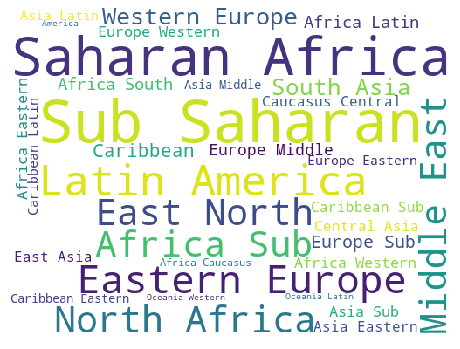

In [19]:
# 7. SHOWING THE MOST MENTIONED REGIONS IN OUR DATASET (WORDCLOUD LIBRARY EXAMPLE)
# In order to see most mentioned regions in our dataset we can use wordcloud library. 
# In this graphic below I didn't filter the dataset related to women issues.

region = data.region
plt.subplots(figsize = (8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(region))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [20]:
# 8. COMPARE ECONOMIC FREEDOM RANKS OF EASTERN AND WESTERN EUROPEAN COUNTRIES
# In this analysis I compared economic freedom ranks of the Western and Eastern European countries.
# Even this subject is not directly related to women' problems, economic problems are always the biggest source in a nation.

dataEF = data.filter(['year', 'ISO_code', 'countries', 'region', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank'])
EastEU = dataEF[dataEF.region == 'Eastern Europe']
WestEU = dataEF[dataEF.region == 'Western Europe']

In [21]:
# Now we can make a graph consist of two traces. 
# First trace will show us the economic freedom rank of Eastern European Countries and 
# the second one will show us economic freedom rank of Western European Countries.

trace1 = go.Box(
                y = WestEU.ef_rank,
                name = 'Economic Freedom Rank of Western European Countries',
                marker = dict(color= 'rgb(78, 54, 23)')
                )
trace2 = go.Box(
                y = EastEU.ef_rank,
                name = 'Economic Freedom Rank of Eastern European Countries',
                marker = dict(color = 'rgb(20, 24, 79)')
                )
efdata = [trace1, trace2]
py.iplot(efdata)

In [22]:
# One can see economic freedom rank is higher and in a norrower trend in Western European Countries 
# while the Eastern European Countries there is a broader variaty.

In [23]:
# 9. ANALYSE THE RELATIONSHIP BETWEEN SECURITY OF WOMEN, SECURITY LEVEL OF THE COUNTRY AND ECONOMIC FREEDOM IN OCEANIC COUNTRIES
# In this section I filtered the human freedom index data to show only Oceania region's security of women,
# security of people and economic freedom rank columns.

dataocean = data[data.region == 'Oceania']
dataocean = dataocean.filter(['pf_ss_women', 'pf_ss', 'ef_rank'])
dataocean['index'] = np.arange(1, len(dataocean)+1)

import plotly.figure_factory as ff
fig = ff.create_scatterplotmatrix(dataocean, diag='box', index = 'index', colormap='Portland', colormap_type='cat',
                                  height=700, width=700)
py.iplot(fig)

In [24]:
# We can see from the graphic above that 
# if the ''economic freedom rank'' is low, ''security of women'' and ''security of human'' levels are low as well.

In [25]:
# 10. SECURTIY OF WOMEN'S WORLD WIDE DISTRIBUTION IN 2016
# To conclude my analysis I compared world countries according to their women's security level in a world map.

dataset = data[data.year == 2016]
dataset = dataset.loc[:, ['year', 'countries', 'pf_ss_women']]
dataset.tail()

,year,countries,pf_ss_women
157,2016,Venezuela,10.000000
158,2016,Vietnam,7.500000
159,2016,"Yemen, Rep.",4.566667
160,2016,Zambia,7.466667
161,2016,Zimbabwe,7.500000


In [26]:
ssw = [dict(
    type = 'choropleth',
    locations = dataset['countries'],
    locationmode = 'country names',
    z = dataset['pf_ss_women'],
    text = dataset['countries'],
    colorscale = [[0,"rgb(5, 10, 172)"],[2,"rgb(40, 60, 190)"],[4,"rgb(70, 100, 245)"],\
            [6,"rgb(90, 120, 245)"],[8,"rgb(106, 137, 247)"],[10,"rgb(220, 220, 220)"]],
    autocolorscale = False,
    reversescale = True,
    marker = dict(line = dict(color = 'rgb(150,150,150)',width = 0.5 )),
    colorbar = dict(autotick=False, tickprefix= '', title='Security of Women'),
)]

layout = dict(
    title = 'Securtiy of Women in 2016',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)

fig = dict(data=ssw, layout=layout)
py.iplot( fig, validate=False, filename='security-of-women')